<a href="https://colab.research.google.com/github/LadonV/Operation-Research/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming Assignment

## Redo a WeBWorK Question Using Python

Consider WW Set 03 Problem 3.  Using python, do the following:
1. Copy your problem here.
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function $P = 3x+2y$.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

## Redo a WeBWorK Question Using Python

Consider WW Set 04 Problem 6.  Using python, do the following:
1. Write the equations that describe the problem completely using $\LaTeX$ encoding.   
1. Find corner points.  
2. Graph feasible set.
3. Find the corner that maximizes the objective function.
4. Introduce slack variables, find the corner points again.
5. Solve using a built-in Linear Programming Solver.  Compare your answers.

# Task
Solve the given linear programming problem: maximize $P=5x_1+6x_2+2x_3$ subject to $-x_1+x_2+10x_3 \le 5$, $-x_1+2x_2+7x_3 \le 4$, $x_1 +8x_2 +9x_3 \le 7$, $x_1 \ge 0$, $x_2 \ge 0$, $x_3 \ge 0$. Find the optimal values of $x_1$, $x_2$, and $x_3$, and the maximum value of $P$.

## Define the problem

### Subtask:
Write out the objective function and constraints in a clear format.


**Reasoning**:
Express the objective function and constraints in a clear format as requested in the instructions.



In [ ]:
print("Objective Function to Maximize:")
print("P = 5x1 + 6x2 + 2x3")
print("\nSubject to the Constraints:")
print("-x1 + x2 + 10x3 <= 5")
print("-x1 + 2x2 + 7x3 <= 4")
print("x1 + 8x2 + 9x3 <= 7")
print("\nNon-negativity Constraints:")
print("x1 >= 0")
print("x2 >= 0")
print("x3 >= 0")

Objective Function to Maximize:
P = 5x1 + 6x2 + 2x3

Subject to the Constraints:
-x1 + x2 + 10x3 <= 5
-x1 + 2x2 + 7x3 <= 4
x1 + 8x2 + 9x3 <= 7

Non-negativity Constraints:
x1 >= 0
x2 >= 0
x3 >= 0


## Solve using a built-in linear programming solver

### Subtask:
Use a Python library like SciPy to solve the linear programming problem.


**Reasoning**:
Import the necessary function from scipy and define the parameters for the linear programming problem, then solve it and print the results.



In [ ]:
from scipy.optimize import linprog
import numpy as np

c = np.array([-5, -6, -2])

A_ub = np.array([
    [-1, 1, 10],
    [-1, 2, 7],
    [1, 8, 9]
])

b_ub = np.array([5, 4, 7])

x1_bounds = (0, None)
x2_bounds = (0, None)
x3_bounds = (0, None)

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x1_bounds, x2_bounds, x3_bounds])

print(result)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -35.0
              x: [ 7.000e+00  0.000e+00  0.000e+00]
            nit: 0
          lower:  residual: [ 7.000e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  3.400e+01  4.300e+01]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 1.200e+01  1.100e+01  0.000e+00]
                 marginals: [-0.000e+00 -0.000e+00 -5.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


## Introduce slack variables

### Subtask:
Rewrite the constraints as equalities by introducing slack variables.


**Reasoning**:
Introduce slack variables to convert the inequality constraints into equalities.



In [ ]:
print("Original Constraints:")
print("-x1 + x2 + 10x3 <= 5")
print("-x1 + 2x2 + 7x3 <= 4")
print("x1 + 8x2 + 9x3 <= 7")
print("\nConstraints with Slack Variables:")
print("-x1 + x2 + 10x3 + s1 = 5")
print("-x1 + 2x2 + 7x3 + s2 = 4")
print("x1 + 8x2 + 9x3 + s3 = 7")
print("\nwhere s1, s2, and s3 are non-negative slack variables (s1 >= 0, s2 >= 0, s3 >= 0).")

Original Constraints:
-x1 + x2 + 10x3 <= 5
-x1 + 2x2 + 7x3 <= 4
x1 + 8x2 + 9x3 <= 7

Constraints with Slack Variables:
-x1 + x2 + 10x3 + s1 = 5
-x1 + 2x2 + 7x3 + s2 = 4
x1 + 8x2 + 9x3 + s3 = 7

where s1, s2, and s3 are non-negative slack variables (s1 >= 0, s2 >= 0, s3 >= 0).


## Find corner points using slack variables

### Subtask:
Determine the corner points of the feasible region using the equations with slack variables.


**Reasoning**:
Define the system of linear equations with slack variables and identify all possible combinations of setting 3 variables to zero to find potential corner points by solving the resulting systems.



In [ ]:
import numpy as np
from itertools import combinations

A = np.array([
    [-1, 1, 10, 1, 0, 0],
    [-1, 2, 7, 0, 1, 0],
    [1, 8, 9, 0, 0, 1]
])
b = np.array([5, 4, 7])

n_vars = A.shape[1]
n_constraints = A.shape[0]
n_zero_vars = n_vars - n_constraints

corner_points = []

for zero_indices in combinations(range(n_vars), n_zero_vars):
    solve_indices = [i for i in range(n_vars) if i not in zero_indices]

    A_sub = A[:, solve_indices]

    if np.linalg.det(A_sub) != 0:
        solution_sub = np.linalg.solve(A_sub, b)

        solution = np.zeros(n_vars)
        for i, original_index in enumerate(solve_indices):
            solution[original_index] = solution_sub[i]

        if np.all(solution >= -1e-9):
            corner_points.append(solution)

print("Potential Corner Points (x1, x2, x3, s1, s2, s3):")
for point in corner_points:
    print(point)

Potential Corner Points (x1, x2, x3, s1, s2, s3):
[0. 0. 0. 5. 4. 7.]
[0.  0.  0.5 0.  0.5 2.5]
[0.    0.875 0.    4.125 2.25  0.   ]
[0.         0.35211268 0.46478873 0.         0.04225352 0.        ]
[ 7.  0.  0. 12. 11.  0.]
[1.31578947 0.         0.63157895 0.         0.89473684 0.        ]


**Reasoning**:
Filter the potential corner points to keep only the non-negative solutions which represent the feasible corner points of the original variables.



In [ ]:
feasible_corner_points = [point for point in corner_points if point[0] >= -1e-9 and point[1] >= -1e-9 and point[2] >= -1e-9]

print("\nFeasible Corner Points (x1, x2, x3):")
for point in feasible_corner_points:
    print(point[:3])


Feasible Corner Points (x1, x2, x3):
[0. 0. 0.]
[0.  0.  0.5]
[0.    0.875 0.   ]
[0.         0.35211268 0.46478873]
[7. 0. 0.]
[1.31578947 0.         0.63157895]


## Find the corner that maximizes the objective function

### Subtask:
Find the corner that maximizes the objective function.


**Reasoning**:
Define the objective function and iterate through the feasible corner points to find the one that maximizes the objective function.



In [ ]:
def objective_function(point):

    return 5 * point[0] + 6 * point[1] + 2 * point[2]

max_p = -float('inf')
optimal_corner_point = None

for point in feasible_corner_points:
    p_value = objective_function(point[:3])
    if p_value > max_p:
        max_p = p_value
        optimal_corner_point = point[:3]

print("\nOptimal Corner Point (x1, x2, x3):")
print(optimal_corner_point)
print(f"\nMaximum value of P: {max_p}")


Optimal Corner Point (x1, x2, x3):
[7. 0. 0.]

Maximum value of P: 35.0


LP (LaTeX):
 
\begin{aligned}
\text{Maximize } &P = 5x_1 + 6x_2 + 2x_3\\
\text{subject to } &-x_1 + x_2 + 10x_3 \le 5,\\
&-x_1 + 2x_2 + 7x_3 \le 4,\\
&x_1 + 8x_2 + 9x_3 \le 7,\\
&x_1, x_2, x_3 \ge 0.
\end{aligned}


Feasible corner points (unique):
 1: x = [0.         0.35211268 0.46478873], P = 3.042254, from ('c1', 'c3', 'x1=0')
 2: x = [1.31578947 0.         0.63157895], P = 7.842105, from ('c1', 'c3', 'x2=0')
 3: x = [0.  0.  0.5], P = 1.000000, from ('c1', 'x1=0', 'x2=0')
 4: x = [0.    0.875 0.   ], P = 5.250000, from ('c3', 'x1=0', 'x3=0')
 5: x = [7. 0. 0.], P = 35.000000, from ('c3', 'x2=0', 'x3=0')
 6: x = [0. 0. 0.], P = 0.000000, from ('x1=0', 'x2=0', 'x3=0')


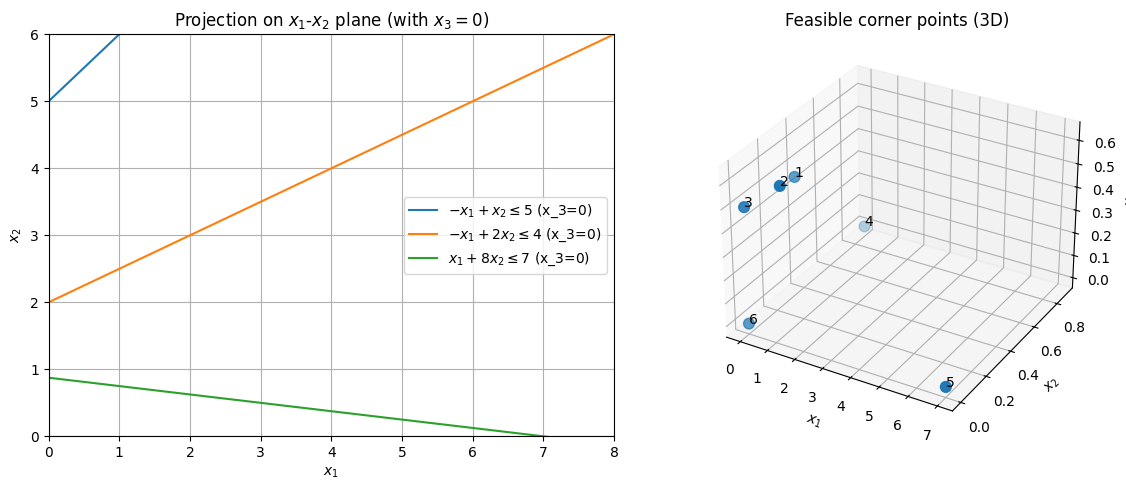


Best corner (max P) is corner #5 = [7. 0. 0.] with P = 35.000000

Slack-based BFS (feasible basic solutions with slacks):
 1: basis ('x1', 'x3', 's2'), x = [1.31578947 0.         0.63157895], s = [0.         0.89473684 0.        ], P = 7.842105
 2: basis ('x1', 's1', 's2'), x = [7. 0. 0.], s = [12. 11.  0.], P = 35.000000
 3: basis ('x2', 'x3', 's2'), x = [0.         0.35211268 0.46478873], s = [0.         0.04225352 0.        ], P = 3.042254
 4: basis ('x2', 's1', 's2'), x = [0.    0.875 0.   ], s = [4.125 2.25  0.   ], P = 5.250000
 5: basis ('x3', 's2', 's3'), x = [0.  0.  0.5], s = [0.  0.5 2.5], P = 1.000000
 6: basis ('s1', 's2', 's3'), x = [0. 0. 0.], s = [5. 4. 7.], P = 0.000000

linprog (HiGHS) result:
  x = [7. 0. 0.]
  P = 35.0

Summary:
  Corner-based best P = 35.000000 at [7. 0. 0.]
  linprog P        = 35.000000 at [7. 0. 0.]
  -> Both methods agree on the optimal solution.


In [ ]:

import itertools
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt


A = np.array([[-1.,  1., 10.],
              [-1.,  2.,  7.],
              [ 1.,  8.,  9.]])
b = np.array([5., 4., 7.])
c = np.array([5., 6., 2.])

TOL = 1e-8


latex_problem = r"""
\begin{aligned}
\text{Maximize } &P = 5x_1 + 6x_2 + 2x_3\\
\text{subject to } &-x_1 + x_2 + 10x_3 \le 5,\\
&-x_1 + 2x_2 + 7x_3 \le 4,\\
&x_1 + 8x_2 + 9x_3 \le 7,\\
&x_1, x_2, x_3 \ge 0.
\end{aligned}
"""
print("LP (LaTeX):\n", latex_problem)


def is_feasible(x, A=A, b=b, tol=1e-7):
    return np.all(x >= -tol) and np.all(A.dot(x) <= b + tol)


equations = []
for i in range(3):
    equations.append((A[i], b[i], f"c{i+1}"))
equations.append((np.array([1.,0.,0.]), 0., "x1=0"))
equations.append((np.array([0.,1.,0.]), 0., "x2=0"))
equations.append((np.array([0.,0.,1.]), 0., "x3=0"))

corner_points = []
corner_labels = []
for combo in itertools.combinations(equations, 3):
    M = np.vstack([row[0] for row in combo])
    rhs = np.array([row[1] for row in combo])

    try:
        sol = np.linalg.solve(M, rhs)
    except np.linalg.LinAlgError:
        continue

    sol[np.abs(sol) < 1e-12] = 0.0
    if is_feasible(sol):

        if not any(np.allclose(sol, existing, atol=1e-7) for existing in corner_points):
            corner_points.append(sol)
            corner_labels.append(tuple(row[2] for row in combo))

corner_points = np.array(corner_points)

print("\nFeasible corner points (unique):")
if corner_points.size == 0:
    print("  (none found)")
else:
    for i,pt in enumerate(corner_points, start=1):
        print(f"{i:2d}: x = {pt}, P = {c.dot(pt):.6f}, from {corner_labels[i-1]}")


x1_vals = np.linspace(0, 8, 400)

x2_ub1 = 5 + x1_vals
x2_ub2 = (4 + x1_vals) / 2.0
x2_ub3 = (7 - x1_vals) / 8.0

plt.figure(figsize=(12,5))
ax = plt.subplot(1,2,1)
ax.plot(x1_vals, x2_ub1, label=r'$-x_1 + x_2 \leq 5$ (x_3=0)')
ax.plot(x1_vals, x2_ub2, label=r'$-x_1 + 2x_2 \leq 4$ (x_3=0)')
ax.plot(x1_vals, x2_ub3, label=r'$x_1 + 8x_2 \leq 7$ (x_3=0)')
ax.set_xlim(0,8)
ax.set_ylim(0,6)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Projection on $x_1$-$x_2$ plane (with $x_3=0$)')
ax.legend()
ax.grid(True)


from mpl_toolkits.mplot3d import Axes3D
ax2 = plt.subplot(1,2,2, projection='3d')
if corner_points.size > 0:
    ax2.scatter(corner_points[:,0], corner_points[:,1], corner_points[:,2], s=60)
    for i,pt in enumerate(corner_points):
        ax2.text(pt[0], pt[1], pt[2], f"{i+1}")
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')
ax2.set_zlabel('$x_3$')
ax2.set_title('Feasible corner points (3D)')
plt.tight_layout()
plt.show()


if corner_points.size > 0:
    Ps = np.dot(corner_points, c)
    idx_best = int(np.argmax(Ps))
    best_pt = corner_points[idx_best]
    best_P = Ps[idx_best]
    print(f"\nBest corner (max P) is corner #{idx_best+1} = {best_pt} with P = {best_P:.6f}")
else:
    best_pt = None
    best_P = None
    print("\nNo feasible corners to evaluate.")


A_slack = np.hstack([A, np.eye(3)])
var_names = ['x1','x2','x3','s1','s2','s3']

bfs_solutions = []
bfs_bases = []
for basis in itertools.combinations(range(6), 3):
    B = A_slack[:, basis]
    try:
        x_basic = np.linalg.solve(B, b)
    except np.linalg.LinAlgError:
        continue
    full = np.zeros(6)
    full[list(basis)] = x_basic

    if np.all(full >= -TOL):
        x_part = full[:3]
        if is_feasible(x_part):
            bfs_solutions.append(full)
            bfs_bases.append(tuple(var_names[i] for i in basis))

print("\nSlack-based BFS (feasible basic solutions with slacks):")
for i,full in enumerate(bfs_solutions, start=1):
    x_part = full[:3]
    s_part = full[3:]
    print(f"{i:2d}: basis {bfs_bases[i-1]}, x = {x_part}, s = {s_part}, P = {c.dot(x_part):.6f}")


res = linprog(-c, A_ub=A, b_ub=b, bounds=[(0, None)]*3, method='highs')

print("\nlinprog (HiGHS) result:")
if res.success:
    x_star = res.x
    print("  x =", x_star)
    print("  P =", c.dot(x_star))
else:
    print("  linprog did not find a solution:", res.message)


print("\nSummary:")
if best_pt is not None and res.success:
    print(f"  Corner-based best P = {best_P:.6f} at {best_pt}")
    print(f"  linprog P        = {c.dot(res.x):.6f} at {res.x}")
    if np.allclose(best_pt, res.x, atol=1e-6):
        print("  -> Both methods agree on the optimal solution.")
    else:
        print("  -> Methods differ (check tolerances / degeneracy).")
else:
    print("  Not enough info to compare.")



Wasn't able to fully understand how to code for both of these problems tried looking it up and using some AI to figure it out and it only got more confusting. Finished using Gemeni and ChatGPT to try and figure something out and got something decent for the first problem but the second problem seemed to create very confusing code and don't exactly know what it did.